# Homework \#5 (4 points)

## Problem 1 - Nonlinear Manufacturing

A manufacturing company produces $n$ individual products. The production process for each product involves $m$ stages with limited resource availability for each stage. The company wants to minimize the total production cost while satisfying demand and staying within resource restrictions. The cost function can be represented as the product of the production level of each product raised to a given power ($a_i$ for product $i$), multiplied by cost coefficients ($c_i$ for product $i$). In other words, the cost can be written as $\Pi_{i=1}^n(c_ix_i^{a_i})$.

There is a minimum demand level that must be met for each product $i$ ($d_i$). Each product $i$ requires $r_{ij}$ of resource $j$ for the $j$th stage of production, and no more than $R_j$ of resource $j$ can be used in total. (In other words, $\sum_{i=1}^nr_{ij}x_i \leq R_j$ for all stages $j = 1,\dotsm,m$.

(a) Express this problem as a nonlinear program, and convert it into a convex optimization problem. _Hint_: Use the log function.


* (var) number of each product: $x_i$ --> $X = [x_1, x_2, \dotsm, x_n]$
* (obj) cost of each product: $c_ix_i^{a_i}$ --> $CX^A, C = [c_1, c_2, \dotsm, c_n], X = [x_1, x_2, \dotsm, x_n], A = [a_1, a_2, \dotsm, a_n]$
* (cons) demand of each product: $x_i \geq d_i$ --> $X \geq D, X = [x_1, x_2, \dotsm, x_n], D = [d_1, d_2, \dotsm, d_n]$
* (cons) resource: $\sum_{i=1}^nr_{ij}x_i \leq R_j$  --> $SX \leq R, S = [r_{11}, r_{12}, \dotsm, r_{nm}], X = [x_1, x_2, \dotsm, x_n], R = [r_1, r_2, \dotsm, r_n]$

\begin{align}
\min⁡&CX^A\\
\text{s.t.}& \ X \geq D\\
& \ SX \leq R
\end{align}

-->

\begin{align}
\min⁡&CX^A\\
\text{s.t.}& \ X/D \geq 1\\
& \ SX/R \leq 1
\end{align}

$X = exp(Y)$
--> 

\begin{align}
\min⁡&log⁡(e^{log(C)+AY}))\\
\text{s.t.}& \ \log⁡(e^{(log⁡(1/D)+Y)}) \geq0\\
& \ log⁡(e^{(log⁡(S/R)+Y)}) \leq0
\end{align}

-->

### Answer:
\begin{align}
\min⁡&log⁡(e^{log(C)+AY}))\\
\text{s.t.}& \ \ Y \geq D\\
& \ \ YS \leq R
\end{align}

(b) Consider  a  simple  instance  of  this  problem where $n = 3$ and $m = 3$. The cost coefficients are $c = [1; 2; 3]$ and the exponents are $a = [0.5; 0.4; 0.3]$. Demand for products 1, 2, and 3 is 100, 150, and 200, resepctively. The resource constraints can be represented as follows:
\begin{align*}
& 0.1x_1+0.2x_2+0.3x_3 \le 500\\
& 0.2x_1 + 0.1x_2 + 0.4x_3 \le 600\\
& 0.3x_1 + 0.3x_2  +0.2x_3 \le 700
\end{align*}

Solve this problem using JuMP. Use the Ipopt solver (or any other solver that can solve convex optimization problems) and the "@NLobjective(...)" command to let the solver know it needs to deal appropriately with a nonlinear objective function. What are the optimal production levels for each product?


### Answer:

In [2]:
# data
c = [1, 2, 3]
a = [0.5, 0.4, 0.3]
d = [100, 150, 200]
s = [0.1 0.2 0.3;
     0.2 0.1 0.4;
     0.3 0.3 0.2]
r = [500, 600, 700]

# model
using JuMP, Ipopt

m = Model(Ipopt.Optimizer)

@variable(m, y[1:3])
@NLobjective(m, Min, log(exp(log(c)+a*y)))
@constraint(m, y .>= d)
@constraint(m, ys .<= r)

optimize!(m)

println()
x = exp(value(y))
println("product #: ", x)
println("Min Cost: ", objective_value(m))

LoadError: Unexpected array [1, 2, 3] in nonlinear expression. Nonlinear expressions may contain only scalar expressions.

## Problem 2 - Minimum Enclosing Circles


Formulate a quadratic program to solve this variation of the minimum
enclosing ball (MEB) problem. You need to determine the centers $z_j$ and radii $d_j$ of a set of balls (circles) $j\in J$ so that each of a set
of points $i \in I$ located at $c_i$ are enclosed in your generated circles.
The catch: each point is assigned a "color." The set of points of each
color should be enclosed in a circle of the "same color" (note that it
doesn't actually matter what color your circle is; you will just need a
 set of constraints for all the points belonging to a given color).


Your task is to find the optimal set of circles such that each circle
encloses the appropriate set of points and the radius (defined below) is minimized. All points must belong to at least one circle. It is okay for a point to belong to multiple circles. 

Solve the problem twice, defining the minimum radius in each of these two ways:

(a) Define minimum radius as the sum of all the radii of your $k$ circles (or radii squared). Try solving this with at least two values of \(k\) representing the number of colors (e.g., \(k = 2\) and
\(k > 2\)) to test your model.

(b) Define minimum radius as the minimum of the largest of the $k$ radii (or radii squared) -- this is a variation on the minimax problem. Try solving this with at least two values of \(k\) representing the number of colors (e.g., \(k = 2\) and \(k > 2\)) to test your model. 

(c) What do you observe (visually) about the circles produced by (a) and (b)? Is there a noticable difference in circle size? (Does this match what you expect from our Regularization lectures?)

You can use the following code to start building your model. Start with $n=6$ points to help with debugging, but display the output of your model for both $n=6$ and a very large value of $n$, such as $n=200$.

### Answer (a) (b)

# of points: 6, # of colors (circles): 2
Set parameter Username
Academic license - for non-commercial use only - expires 2025-07-17
Centers:[0.4086523962004467 0.4746692794713808; 0.6284283901583398 0.49773321524899594]Radii Squared: [0.1856708447082544, 0.08703636519028989]

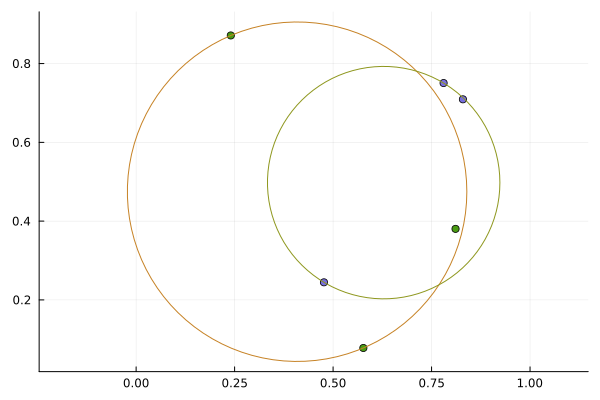

In [54]:
n = 6 # number of points (small value to start)
k = 2 # number of colors (circles) to use (small value to start)
println("# of points: ", n, ", # of colors (circles): ", k)
using Random, Plots

# randomly generate n points with (x,y) coords between 0 and 1
points = [(rand(),rand()) for i in 1:n]

# randomly assigned points to colors
point_color = [[] for i in 1:k]
pc = rand(1:k,n) 

for i in 1:n
    for j in 1:k
        if pc[i] == j
            point_color[j] = vcat(point_color[j],points[i])
        end
    end
end

# randomly generate color hex code
color = ["" for i in 1:k]
for i in 1:k
    color[i] = randstring(['0':'9'; 'a':'f'])
end

using JuMP, Gurobi

m = Model(Gurobi.Optimizer)
set_optimizer_attribute(m, "OutputFlag",0)

@variable(m, x[1:k, 1:2]) # variable for coordinates of circle center
@variable(m, d[1:k] >= 0) # variable representing r^2

@objective(m, Min, π*sum(d[j] for j in 1:k)) # we want to minimize the area (this is linear, so it is convex AND concave)

for j in 1:k
    cnt = length(point_color[j])
    for i in 1:cnt
        @constraint(m, (x[j, 1] - point_color[j][i][1])^2 + (x[j, 2] - point_color[j][i][2])^2 <= d[j] )
    end
end

optimize!(m)

print("Centers:", value.(x))
print("Radii Squared: ", value.(d))

### FOR PLOTTING AFTER SOLVING PROBLEM ###

fig = plot(aspect_ratio=:equal)
# replot n points
# for each of the colors
for j in 1:k
    # for each point belonging to that color
    for i in 1:length(point_color[j])
        # create a string of the color hex code
        colstring = string("#",color[j])
        # plot the ith point belonging to color j (x_coord, y_coord) 
        scatter!( [point_color[j][i][1]],[point_color[j][i][2]],
            color=colstring,
            legend=false) # color of point is randomly generated hex code
    end
end

t = range(0,stop=2*pi,length=100) # parameter that traverses the perimeter of a circle

# for each color
for i in 1:k
    # plot circle centers
    plot!([value(x[i,1])],[value(x[i,2])])
    # plot perimeter of circle by tracing with t parameter. radius is square root of r value.
    # plot!([value(x[i,1]) .+ sqrt(max(0,value(r[i])))*cos.(t)], 
    #     [value(x[i,2]) .+ sqrt(max(0,value(r[i])))*sin.(t)],legend=false) 
    plot!( value(x[i, 1]) .+ sqrt(value(d[i]))*cos.(t), value(x[i, 2]) .+ sqrt(value(d[i]))*sin.(t)) 
end

# display figure
fig

Set parameter Username
Academic license - for non-commercial use only - expires 2025-07-17
Centers:[0.4086052991738301 0.47464933881492727; 0.643857012967941 0.5157168286366354]Radii Squared: [0.18567087212367026, 0.1672554972174743]

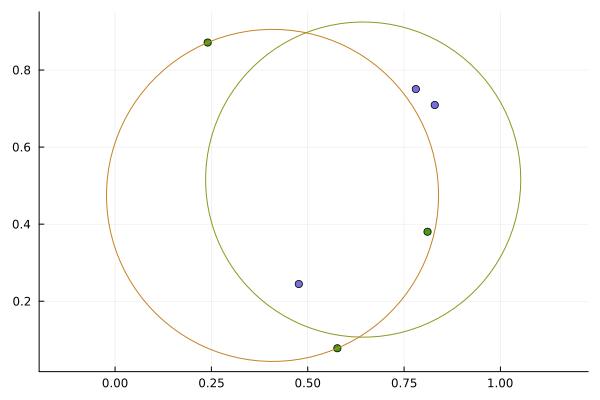

In [55]:
using JuMP, Gurobi

m = Model(Gurobi.Optimizer)
set_optimizer_attribute(m, "OutputFlag",0)

@variable(m, x[1:k, 1:2]) # variable for coordinates of circle center
@variable(m, d[1:k] >= 0) # variable representing r^2
@variable(m, t) # epigraph trick variable

@objective(m, Min, t) # we want to minimize max radius

for j in 1:k
    @constraint(m, t >= π*d[j])
    cnt = length(point_color[j])
    for i in 1:cnt
        @constraint(m, (x[j, 1] - point_color[j][i][1])^2 + (x[j, 2] - point_color[j][i][2])^2 <= d[j] )
    end
end

optimize!(m)

print("Centers:", value.(x))
print("Radii Squared: ", value.(d))

### FOR PLOTTING AFTER SOLVING PROBLEM ###

fig = plot(aspect_ratio=:equal)
# replot n points
# for each of the colors
for j in 1:k
    # for each point belonging to that color
    for i in 1:length(point_color[j])
        # create a string of the color hex code
        colstring = string("#",color[j])
        # plot the ith point belonging to color j (x_coord, y_coord) 
        scatter!( [point_color[j][i][1]],[point_color[j][i][2]],
            color=colstring,
            legend=false) # color of point is randomly generated hex code
    end
end

t = range(0,stop=2*pi,length=100) # parameter that traverses the perimeter of a circle

# for each color
for i in 1:k
    # plot circle centers
    plot!([value(x[i,1])],[value(x[i,2])])
    # plot perimeter of circle by tracing with t parameter. radius is square root of r value.
    # plot!([value(x[i,1]) .+ sqrt(max(0,value(r[i])))*cos.(t)], 
    #     [value(x[i,2]) .+ sqrt(max(0,value(r[i])))*sin.(t)],legend=false) 
    plot!( value(x[i, 1]) .+ sqrt(value(d[i]))*cos.(t), value(x[i, 2]) .+ sqrt(value(d[i]))*sin.(t)) 
end

# display figure
fig

### Answer (c)
Method (a) results in one circle with a much smaller radius than the other. In contrast, method (b) produces circles with more balanced radii, minimizing the largest radius and resulting in circles that are more similar in size. Visually, method (b) shows less size difference between the circles than method (a).

# of points: 200, # of colors (circles): 3
Set parameter Username
Academic license - for non-commercial use only - expires 2025-07-17
Centers:[0.45739085364795307 0.5108178518728047; 0.5127694722560666 0.4940734814506622; 0.4729302502033888 0.5173923896933732]Radii Squared: [0.3885540551083585, 0.4353359854899217, 0.36882934447404636]

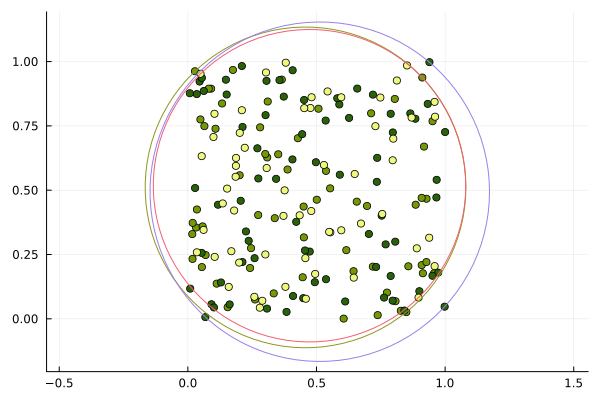

In [56]:
n = 200 # number of points (small value to start)
k = 3 # number of colors (circles) to use (small value to start)
println("# of points: ", n, ", # of colors (circles): ", k)
using Random, Plots

# randomly generate n points with (x,y) coords between 0 and 1
points = [(rand(),rand()) for i in 1:n]

# randomly assigned points to colors
point_color = [[] for i in 1:k]
pc = rand(1:k,n) 

for i in 1:n
    for j in 1:k
        if pc[i] == j
            point_color[j] = vcat(point_color[j],points[i])
        end
    end
end

# randomly generate color hex code
color = ["" for i in 1:k]
for i in 1:k
    color[i] = randstring(['0':'9'; 'a':'f'])
end

using JuMP, Gurobi

m = Model(Gurobi.Optimizer)
set_optimizer_attribute(m, "OutputFlag",0)

@variable(m, x[1:k, 1:2]) # variable for coordinates of circle center
@variable(m, d[1:k] >= 0) # variable representing r^2

@objective(m, Min, π*sum(d[j] for j in 1:k)) # we want to minimize the area (this is linear, so it is convex AND concave)

for j in 1:k
    cnt = length(point_color[j])
    for i in 1:cnt
        @constraint(m, (x[j, 1] - point_color[j][i][1])^2 + (x[j, 2] - point_color[j][i][2])^2 <= d[j] )
    end
end

optimize!(m)

print("Centers:", value.(x))
print("Radii Squared: ", value.(d))

### FOR PLOTTING AFTER SOLVING PROBLEM ###

fig = plot(aspect_ratio=:equal)
# replot n points
# for each of the colors
for j in 1:k
    # for each point belonging to that color
    for i in 1:length(point_color[j])
        # create a string of the color hex code
        colstring = string("#",color[j])
        # plot the ith point belonging to color j (x_coord, y_coord) 
        scatter!( [point_color[j][i][1]],[point_color[j][i][2]],
            color=colstring,
            legend=false) # color of point is randomly generated hex code
    end
end

t = range(0,stop=2*pi,length=100) # parameter that traverses the perimeter of a circle

# for each color
for i in 1:k
    # plot circle centers
    plot!([value(x[i,1])],[value(x[i,2])])
    # plot perimeter of circle by tracing with t parameter. radius is square root of r value.
    # plot!([value(x[i,1]) .+ sqrt(max(0,value(r[i])))*cos.(t)], 
    #     [value(x[i,2]) .+ sqrt(max(0,value(r[i])))*sin.(t)],legend=false) 
    plot!( value(x[i, 1]) .+ sqrt(value(d[i]))*cos.(t), value(x[i, 2]) .+ sqrt(value(d[i]))*sin.(t)) 
end

# display figure
fig

Set parameter Username
Academic license - for non-commercial use only - expires 2025-07-17
Centers:[0.453048421997747 0.47959032982143; 0.5127707181941891 0.49407242708482935; 0.4561948243938876 0.49387103377150604]Radii Squared: [0.43236150365779025, 0.43533593188724806, 0.43137513224029134]

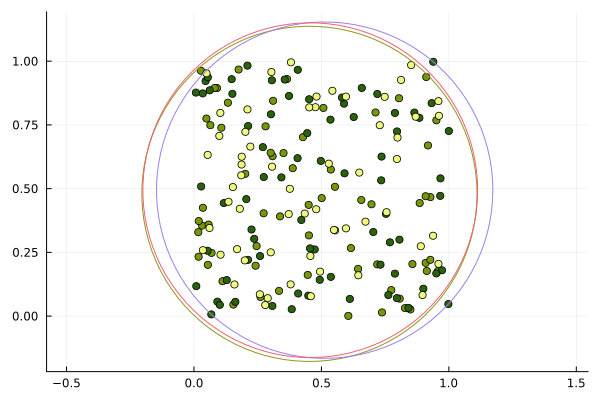

In [57]:
using JuMP, Gurobi

m = Model(Gurobi.Optimizer)
set_optimizer_attribute(m, "OutputFlag",0)

@variable(m, x[1:k, 1:2]) # variable for coordinates of circle center
@variable(m, d[1:k] >= 0) # variable representing r^2
@variable(m, t) # epigraph trick variable

@objective(m, Min, t) # we want to minimize max radius

for j in 1:k
    @constraint(m, t >= π*d[j])
    cnt = length(point_color[j])
    for i in 1:cnt
        @constraint(m, (x[j, 1] - point_color[j][i][1])^2 + (x[j, 2] - point_color[j][i][2])^2 <= d[j] )
    end
end

optimize!(m)

print("Centers:", value.(x))
print("Radii Squared: ", value.(d))

### FOR PLOTTING AFTER SOLVING PROBLEM ###

fig = plot(aspect_ratio=:equal)
# replot n points
# for each of the colors
for j in 1:k
    # for each point belonging to that color
    for i in 1:length(point_color[j])
        # create a string of the color hex code
        colstring = string("#",color[j])
        # plot the ith point belonging to color j (x_coord, y_coord) 
        scatter!( [point_color[j][i][1]],[point_color[j][i][2]],
            color=colstring,
            legend=false) # color of point is randomly generated hex code
    end
end

t = range(0,stop=2*pi,length=100) # parameter that traverses the perimeter of a circle

# for each color
for i in 1:k
    # plot circle centers
    plot!([value(x[i,1])],[value(x[i,2])])
    # plot perimeter of circle by tracing with t parameter. radius is square root of r value.
    # plot!([value(x[i,1]) .+ sqrt(max(0,value(r[i])))*cos.(t)], 
    #     [value(x[i,2]) .+ sqrt(max(0,value(r[i])))*sin.(t)],legend=false) 
    plot!( value(x[i, 1]) .+ sqrt(value(d[i]))*cos.(t), value(x[i, 2]) .+ sqrt(value(d[i]))*sin.(t)) 
end

# display figure
fig

## Problem 3 - Puppies!

Let's suppose the CS524 class has decided collectivley to adopt some puppies. There are 6 different breeds of dogs we can adopt.  Each breed has a minimum and maximum number of puppies if we adopt any of that breed (we have to adopt entire litters so no puppies are left alone!).  These restrictions, along with the expected happiness we get from each breed, are in the following table:

| Breed | Min adopted  | Max adopted  | Happiness |
|----------------|----|----|----|
| Golden retriever   | 5 | 7| 8|
| Shiba Inu | 2 | 10 | 9|
| Great Dane | 3 | 5| 4|
| Pomeranian | 6|13|5|
| Water Spaniel (WI state dog!) | 3| 15 | 10|
| Husky | 7 | 10 | 3|

Because  of  how insane Huskies are, the  total number of Husky puppies adopted should be no more than the combined number of Golden Retriver, Water Spaniel, and Shiba Inu puppies.  In addition, if any Pomeranians are adopted, we require that at least the minimum number of Great Dane puppies are adopted. We will adopt exactly 35 total dogs and obviously we want to maximize our total happiness. Which breeds of puppies should we adopt, and how many of each? Formulate an integer _linear_ program (i.e., all constraints \& objective must be linear functions, even though variables can now be restricted to integer values) that can answer this question, then implement and solve it using Julia/JuMP. (Cbc, HiGHS, and Gurobi can all solve integer linear programming problems.)

### Answer:

In [64]:
using JuMP, Gurobi

d = [:gr, :si, :gd, :pr, :ws, :hk]
min_adopt = Dict(zip(d, [5 2 3 6 3 7]))
max_adopt = Dict(zip(d, [7 10 5 13 15 10]))
happ = Dict(zip(d, [8 9 4 5 10 3]))

M = 100

m = Model(Gurobi.Optimizer)
set_optimizer_attribute(m,"OutputFlag",0)

@variable(m, x[d] >= 0, Int) # how many do we adopt of dog d?

@objective(m, Max, sum(x[i]*happ[i] for i in d))
    
@constraint(m, breed_min_constr[i in d], x[i] >= min_adopt[i])
@constraint(m, breed_max_constr[i in d], x[i] <= max_adopt[i])
@constraint(m, x[:hk] <= x[:gr] + x[:ws] + x[:si])
@constraint(m, x[:pr] <= M * x[:gd])
@constraint(m, sum(x[i] for i in d) == 35)

optimize!(m)

println("Adopt the following dogs: " )
for i in d
    println(value(x[i]), " ", i)
end
println("Total Happiness: ", objective_value(m))

Set parameter Username
Academic license - for non-commercial use only - expires 2025-07-17
Adopt the following dogs: 
5.0 gr
2.0 si
3.0 gd
6.0 pr
12.0 ws
7.0 hk
Total Happiness: 241.0
